# Home Assignment No. 1
## v1.0
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    
    out = arr - arr.mean(axis = 0)
    
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{4,8\}$, $r\in\{1,2\}$, $d\in\{2,4\}$.

Make sure that each plot has a different color.

To compute LCM you can use `math.gcd` and the relationship between LCM and GCD.

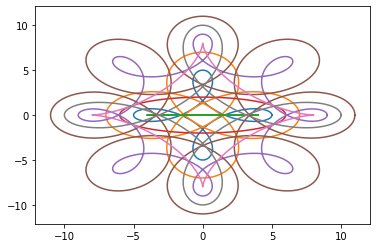

In [3]:
### BEGIN Solution (do not delete this comment)
import math

x = lambda t, R, r, d : (R-r)*np.cos(t)+d*np.cos((R-r)/r*t)
y = lambda t, R, r, d : (R-r)*np.sin(t)-d*np.sin((R-r)/r*t)

for R in [4,8]:
    for r in [1,2]:
        for d in [2,4]:
            t = np.linspace(0, 2*np.pi*np.lcm(r,R)/R, 1000) 
            plt.plot(x(t, R, r, d), y(t, R, r, d))
### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

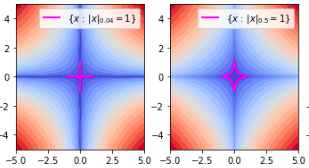

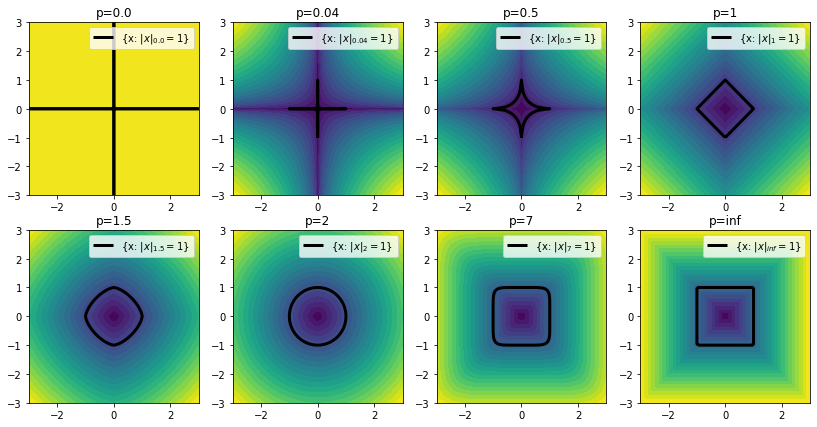

In [4]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution (do not delete this comment)

    calculate_norm = np.vectorize(lambda x, y, p : np.linalg.norm([x,y], p))
    
    z = calculate_norm(xx, yy, p)
    ax.contourf(xx, yy, z, levels=np.linspace(z.min(), z.max(), 25))
    a = ax.contour(xx, yy, z, levels=[1], linewidths=3, colors='k')
    ax.set_title('p=' + str(p))
    ax.legend([a.collections[0]], ['{x: $|x|_{%s} = 1$}' % p])
    
    ### END Solution (do not delete this comment)

plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [20]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

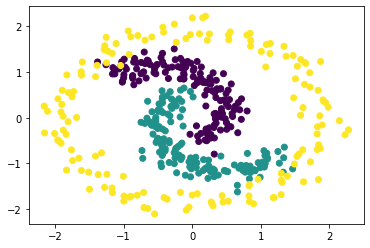

In [21]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![title](data/example.png)

DecisionTreeClassifier
RandomForestClassifier
Logistic Regression
SVC
GaussianNB
KNeighborsClassifier


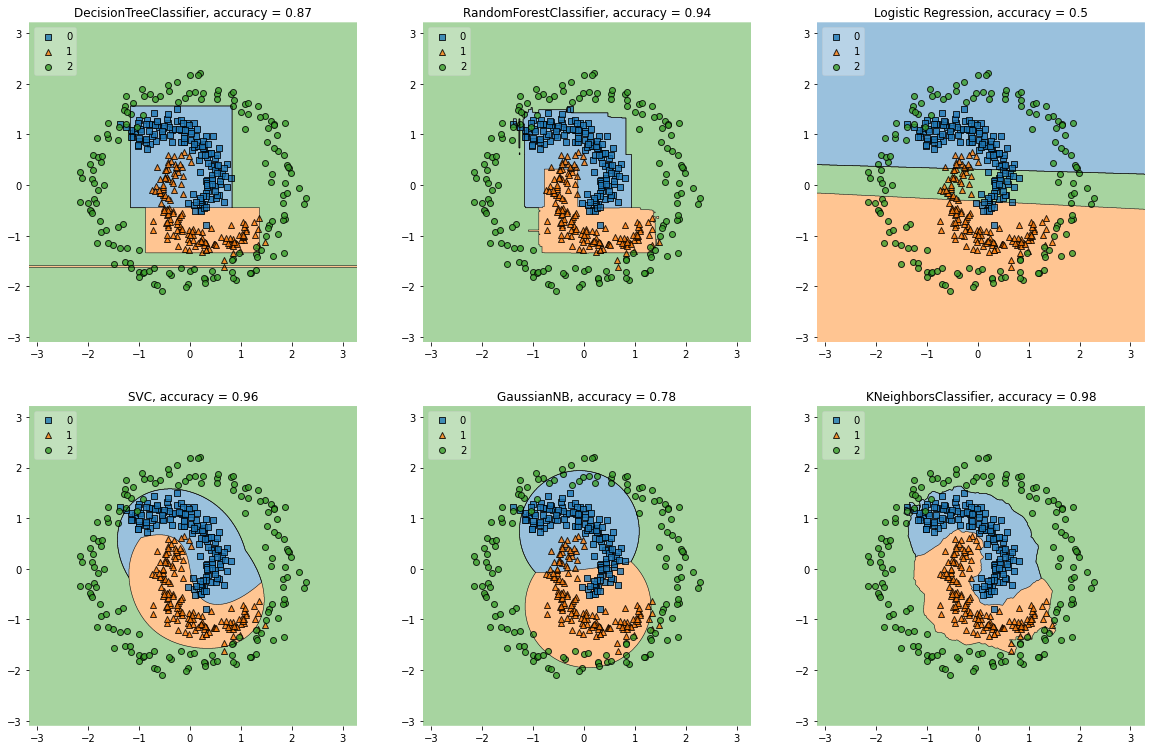

In [25]:
### BEGIN Solution (do not delete this comment)
random_state=42

from sklearn.tree import DecisionTreeClassifier
d_t_c = DecisionTreeClassifier(max_depth=4, random_state=random_state)

from sklearn.ensemble import RandomForestClassifier
r_f_c = RandomForestClassifier(n_estimators = 25, max_depth=4, random_state=random_state)

from sklearn.linear_model import LogisticRegression
l_r = LogisticRegression(random_state=random_state)

from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=random_state)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)


from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score
import itertools

gs = gridspec.GridSpec(3, 3)
fig = plt.figure(figsize=(20, 20))

labels = ['DecisionTreeClassifier',
          'RandomForestClassifier',
          'Logistic Regression',
          'SVC',
          'GaussianNB',
          'KNeighborsClassifier']

for clf, lab, grd in zip([d_t_c, r_f_c, l_r, svc, gnb, knn],
                         labels,
                         itertools.product((0,1),(0,1,2))):
    print(lab)
    clf.fit(X, y)
    accuracy=accuracy_score(y, clf.predict(X))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab + ', accuracy = ' + str(np.round(accuracy,2)))

plt.show()

### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

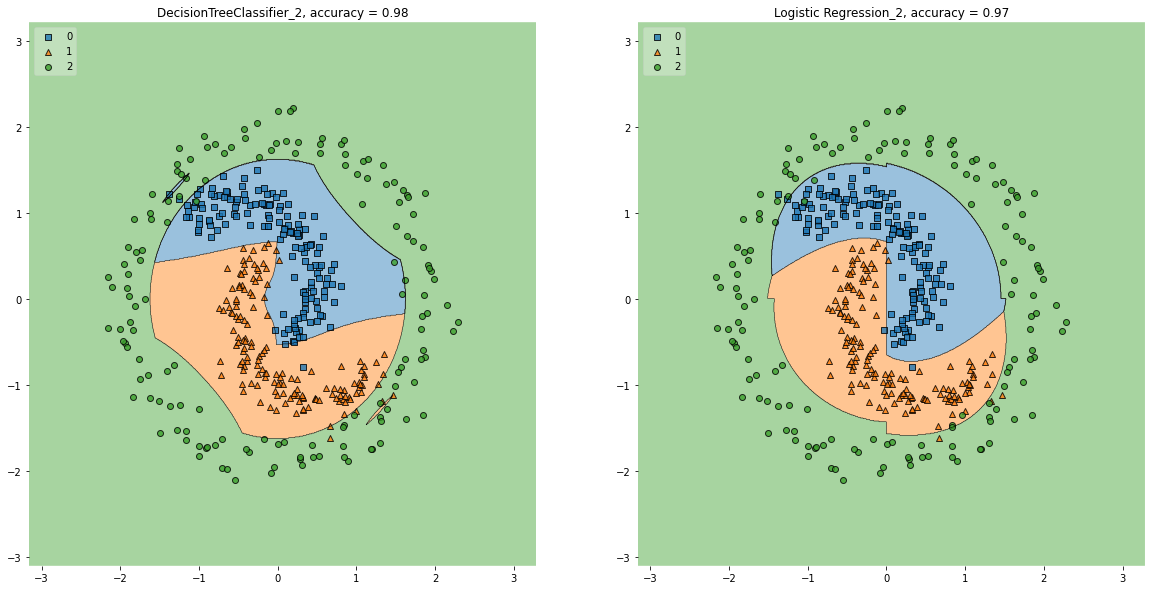

In [26]:
### BEGIN Solution (do not delete this comment)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.random_projection import GaussianRandomProjection
from sklearn.preprocessing import StandardScaler

class NewFeature():
    
    def __init__(self, f):
        self.f = f
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return self.f(X)

def add_distance(X):
    distance = np.sqrt(X[:,0]**2 + X[:,1]**2)
    return np.hstack((X, distance[:, None]))
    
def add_angle(X):
    angle = np.arctan(X[:,0] / X[:,1]) + np.pi * (X[:,0] < 0)
    return np.hstack((X, angle[:, None]))

poly = PolynomialFeatures(3)#didn't help for DecisionTreeClassifier
transformer = GaussianRandomProjection(n_components=2, random_state=np.random.RandomState(42))


#l_r = LogisticRegression(random_state=random_state, max_iter=1000)##with 

pipe_d_t_c = Pipeline([('distance',NewFeature(add_distance)), 
                       ('poly', poly), 
                       ('DTC', d_t_c)])#angle made it worse here
pipe_l_r = Pipeline([('distance',NewFeature(add_distance)), 
                     ('angle',NewFeature(add_angle)), 
                     ('poly', poly), 
                     ('scaler', StandardScaler()), 
                     ('LR', l_r)])

gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(20, 10))

labels = ['DecisionTreeClassifier_2',
          'Logistic Regression_2']


for clf, lab, grd in zip([pipe_d_t_c, pipe_l_r],
                         labels,
                         itertools.product([0],(0,1))):
    clf.fit(X, y)
    accuracy=accuracy_score(y, clf.predict(X))
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab + ', accuracy = ' + str(np.round(accuracy,2)))

plt.show()
### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

Adding only polinomial features made it 0.95 for LogReg and nothing for DecisionTree (still 0.86), so I decided to add features.

I added "distance", which is a square root feature (which are not included with polinomial), and "angle".

Both features seemed very useful, cause they give new nonlinear information. However, surprisingly for me, "angle" didn't work for DecisionTree (made in 0.92, when I use both "angle" and "distance"), so there I used only "distance" feature. 

For LogReg using only "distance" gives accuracy=0.96, while adding "angle" give 0.97.

Also for both cases I used PolinomialFeatures, again to add non-linearity.

Scaler helps LogReg to converge faster (because without it model couldn't converge in default max_iter=100 steps (with max_iter=1000 and without Scaler it converges to the same 0.97 accuracy).). For DecisionTree it wasn't needed

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [66]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
827,o,o,o,x,b,x,b,x,b,False
769,o,x,x,b,o,x,o,x,o,False
733,x,b,o,b,b,o,x,x,o,False


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for empty cell `b`.

In [67]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
105,1,1,0,-1,1,-1,-1,1,0
582,0,-1,0,1,-1,-1,1,1,1
890,0,1,1,0,0,1,-1,-1,-1
919,0,-1,1,0,-1,1,1,-1,0


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use the accuracy metric.

Intuitively, this rule is logical, i.e. one may expect a decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [29]:
np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [30]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on a train set for optimal hyperparameter for SVM model in order to achieve a 5-fold validation accuracy score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage you to use the built-in `GridSearchCV` method. **Report** the 5-fold validation accuracy score, test accuracy score using the model refitted with best hyperparameters and also print best hyperparameters. **Explain** the results: does your model overfit?

In [40]:
### BEGIN Solution (do not delete this comment)
from sklearn.model_selection import GridSearchCV

params = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 'auto', 'scale'],
                     'C': 10**np.arange(4)},
                    {'kernel': ['linear'], 'C': 10**np.arange(4)}]

clf = GridSearchCV(svm, params)#5-fold CV is default

clf.fit(X.iloc[train_idx], y.iloc[train_idx])

##Output is taken from sklearn documentation: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

print("Grid scores on CV:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()

    
score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
name = clf.__class__.__name__
print(f'{name} test accuracy score: {round(score, 3)}')



### END Solution (do not delete this comment)

Grid scores on CV:

0.649 (+/-0.010) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.649 (+/-0.010) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.783 (+/-0.378) for {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
0.822 (+/-0.353) for {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
0.653 (+/-0.252) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.649 (+/-0.010) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.224) for {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
0.887 (+/-0.256) for {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.980 (+/-0.079) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.653 (+/-0.252) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.224) for {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
0.887 (+/-0.256) for {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.980 (+/-0.079) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.980 (+/-0.079) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.903 (+/-0.224) for {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}


**Your text answer (do not delete this comment)**:

We got 0.985 accuracy on test data, which corresponds to metrics during training, so there is no overfitting (if it was, we would have much worse score on test data)

### Subproblem 5.2. Feature engineering for Random Forest  (1 of 2 points)
Perform **feature engineering** for Random Forest with given hyperparameters in order to achieve 5-fold mean validation score not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [120]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)

### BEGIN Solution (do not delete this comment)
# def row_col_diag_features(X):
#     X_2 = X.copy().copy()
#     X_2 = pd.DataFrame()
#     X_2['TRS'] = (np.sum(X[['TL', 'TM', 'TR']], axis=1) == 3).to_numpy(dtype = int)
#     X_2['MRS'] = (np.sum(X[['ML', 'MM', 'MR']], axis=1) == 3).to_numpy(dtype = int)
#     X_2['BRS'] = (np.sum(X[['BL', 'BM', 'BR']], axis=1) == 3).to_numpy(dtype = int)
    
#     X_2['LCS'] = (np.sum(X[['TL', 'ML', 'BL']], axis=1) == 3).to_numpy(dtype = int)
#     X_2['MCS'] = (np.sum(X[['TM', 'MM', 'BM']], axis=1) == 3).to_numpy(dtype = int)
#     X_2['RCS'] = (np.sum(X[['TR', 'MR', 'BR']], axis=1) == 3).to_numpy(dtype = int)
    
#     X_2['D1'] = (np.sum(X[['TL', 'MM', 'BR']], axis=1) == 3).to_numpy(dtype = int)
#     X_2['D2'] = (np.sum(X[['BL', 'MM', 'TR']], axis=1) == 3).to_numpy(dtype = int)
    
#     return X_2

def bold_cell_exists(X):
    X_2 = X.copy().copy()
    #X_2['IB'] = (np.sum(X==0, axis=1)%2).to_numpy(dtype = int)
    X_2['IB'] = (np.sum(X==1, axis=1) > np.sum(X==-1, axis=1)).to_numpy(dtype = int)
    return X_2
    
    
from sklearn.model_selection import cross_val_score

X_new = bold_cell_exists(X)

print(np.mean(cross_val_score(rf, X_new.iloc[train_idx], y.iloc[train_idx], cv=5)), 
      cross_val_score(rf, X_new.iloc[train_idx], y.iloc[train_idx], cv=5))

rf.fit(X_new.iloc[train_idx], y.iloc[train_idx])
score = accuracy_score(y.iloc[test_idx], rf.predict(X_new.iloc[test_idx]))
name = rf.__class__.__name__
print(f'{name} scored {round(score, 3)}')



### END Solution (do not delete this comment)

0.9738762559492333 [0.98387097 1.         0.98387097 1.         0.90163934]
RandomForestClassifier scored 0.985


**Your text answer (do not delete this comment)**:

Firstly, I tried adding all row\column\diagonal - wise sums as features (commented row_col_diag_features function), which must be fully enough to 100% predict correct label.

However, for some reason it gave 0.62 for first fold in cross_val_score both when leaving initial features (maybe here it is caused by reason, that RandomForest algorithm is greedy and max_depth is limited so it used not all new features) and when dropping initial features (I guess, it's connected with the fact, that y is not shuffled. So I needed to use some KFold with shuffle or try another features ^_^). Although, on test this model gave 0.986 and 1 accuracy respectively.

So I tried another feature, which is if number of empty cells even or odd. If it is odd - then x won (because x starts the game, so if there are not 0 empty cells and its number is odd, then the last move was from x and lead to the end of game. So target = 1). If it's even, in most cases it will mean, that defeat/draw for x. 

So this feature was enough for achieving 0.97 mean on cv and 0.985 on test

## Task 6. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [2]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
241,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,28.0,24.54
310,295.7,0.0,95.6,171.5,8.9,955.1,859.2,14.0,35.23
363,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,100.0,63.53


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into the train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 6.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the whole train data using 5-fold cross-validation scheme) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the 5-fold mean train score, 5-fold mean validation score and the test score (to obtain test score use the model with best hyperparameters refitted on the whole train set).

In [98]:
### BEGIN Solution (do not delete this comment)

#X_train_t, X_validate, y_train_t, y_validate = train_test_split(X_train, y_train, random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

rfr = RandomForestRegressor(random_state=0)

rfr_params = [{'n_estimators' : [10, 100, 500, 1000],
               'max_depth' : [None, 4, 16],
               'max_samples' : [None, 0.67]}]


etr = ExtraTreesRegressor(random_state=0)

etr_params = [{'n_estimators' : [10, 100, 500, 1000],
               'max_depth' : [None, 4, 16],
               'max_samples' : [None, 0.67],
               'bootstrap' : [True]},
             {'n_estimators' : [10, 100, 500, 1000],
               'max_depth' : [None, 4, 16],
               'bootstrap' : [False]}]

clf_rfr = GridSearchCV(rfr, rfr_params)#5-fold CV is default
clf_etr = GridSearchCV(etr, etr_params)#5-fold CV is default

clf_rfr.fit(X_train, y_train)
print('RandomForestRegressor best parameters:', clf_rfr.best_params_)

clf_etr.fit(X_train, y_train)
print('ExtraTreesRegressor best parameters:', clf_etr.best_params_)

print()

##Second point

rfr_best = clf_rfr.best_estimator_
etr_best = clf_etr.best_estimator_

from sklearn.model_selection import cross_validate

cols = ['Ensemble Classifier', 'Train', 'Valid', 'Test']
row_format ="{:<25}{:<10}{:<10}{:<10}"#code for printing is based on https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
print(row_format.format(*cols))

for model in [etr_best, rfr_best]:
    res = cross_validate(model, X_train, y_train, return_train_score=True, scoring='neg_mean_squared_error')
    train = np.round(np.mean(-res['train_score']), 2)
    valid = np.round(np.mean(-res['test_score']), 2)
    test = np.round(mean_squared_error(y_test, model.predict(X_test)), 2)
    print(row_format.format(model.__class__.__name__, train, valid, test))
### END Solution (do not delete this comment)

RandomForestRegressor best parameters: {'max_depth': 16, 'max_samples': None, 'n_estimators': 500}
ExtraTreesRegressor best parameters: {'bootstrap': False, 'max_depth': 16, 'n_estimators': 500}

Ensemble Classifier      Train     Valid     Test      
ExtraTreesRegressor      1.24      24.8      22.82     
RandomForestRegressor    4.85      27.38     25.03     


### Subproblem 6.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

Train score is much better, than validation and test, because our model fits, basing on samples from train, so it learns dependencies from train and consequently gives better result on it (error is minimized for training sample during training process). Validation and test sets are unknown for the model, so metric value is higher.

ExtraTreesRegressor performs better in all sets.
As our dataset is small 1030x8 it is difficult to study overall trend, so RandomForest is not very good on test data. In turn, ExtraTrees choose threshold and features randomly, so it could guess trend on smaller subsample better (which is what happened in our case).

Maybe, ExtraTrees performs better on train, cause RandomForest uses greedy approach and lose some possible moment, when we should choose not the best feature for now, to have better split later.
Another idea is that due to small dataset, chosen on CV parameters are too strict and RF doesn't fit enough on train, while ExtraTrees do better with random choice of params and thresholds

## Task 7. Multiclass Classification Strategies (1 point)
In this task, you deal with a multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [3]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
65,1.52099,13.69,3.59,1.12,71.96,0.09,9.40,0.0,0.0,1
122,1.51687,13.23,3.54,1.48,72.84,0.56,8.10,0.0,0.0,2
34,1.51783,12.69,3.54,1.34,72.95,0.57,8.75,0.0,0.0,1


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross-validation on the data. The output in the **table** form must include 5-fold mean validation score and the computation time. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own.

**HINT**: use ```time.perf_counter()``` to measure time.

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of the OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [7]:
### BEGIN Solution (do not delete this comment)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_validate
from tqdm.notebook import tqdm
from time import perf_counter
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(max_depth=7, random_state=42)
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(random_state=42, max_iter=10000)#It didn't work without increasing max_iter

test_score = []
time = []

t_start = 0
t_finish = 0


scorer=make_scorer(f1_score, average='weighted')

for tr_type in tqdm(['Multiclass', 'OneVsRest', 'OneVsOne']):
    for model in [lr, rf, knn, dt]:
        if tr_type == 'Multiclass':
            t_start = perf_counter()
            cv_results = cross_val_score(model, X, y, cv=5, scoring='balanced_accuracy', n_jobs=-1)
            t_finish = perf_counter()
            t = t_finish - t_start
        elif tr_type == 'OneVsRest':
            t_start = perf_counter()
            cv_results = cross_val_score(OneVsRestClassifier(model, n_jobs=-1), X, y, cv=5, scoring='balanced_accuracy', 
                                         n_jobs=-1)
            t_finish = perf_counter()
            t = t_finish - t_start
        else:
            t_start = perf_counter()
            cv_results = cross_val_score(OneVsOneClassifier(model, n_jobs=-1), X, y, cv=5, scoring='balanced_accuracy', 
                                         n_jobs=-1)
            t_finish = perf_counter()
            t = t_finish - t_start
        test_score.append(np.mean(cv_results))
        time.append(t)


test_score = np.round(np.array(test_score), 4)
time = np.round(np.array(time), 4)
        
print('Cross Validation Scores')
cols = ['Logistic', 'Random Forest', 'K Nearest Neighbours', 'Decision Tree']
row_format ="{:>10}{:>15}{:>15}{:>22}{:>15}"#code for printing is based on https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
print(row_format.format("", *cols))

for i, tr_type in enumerate(['Multiclass', 'OneVsRest', 'OneVsOne']):
    print(row_format.format(tr_type, *test_score[4*i:4*i+4]))
    
    
print('\n\nTraining Duration (CV=5)')
print(row_format.format("", *cols))

for i, tr_type in enumerate(['Multiclass', 'OneVsRest', 'OneVsOne']):
    print(row_format.format(tr_type, *time[4*i:4*i+4]))
    
### END Solution (do not delete this comment)

  0%|          | 0/3 [00:00<?, ?it/s]

Cross Validation Scores
                 Logistic  Random Forest  K Nearest Neighbours  Decision Tree
Multiclass         0.4615         0.4995                0.5511         0.5746
 OneVsRest         0.3997         0.5495                0.5752         0.5093
  OneVsOne         0.4247         0.5929                0.5549         0.6863


Training Duration (CV=5)
                 Logistic  Random Forest  K Nearest Neighbours  Decision Tree
Multiclass         2.0065         0.5667                0.0651         0.0541
 OneVsRest          1.203         3.2099                0.1889         0.1986
  OneVsOne         2.1625         8.2649                0.4306         0.3004


**Your text answer (do not delete this comment)**:

As class distribution is the following [(1, 70), (2, 76), (3, 17), (5, 13), (6, 9), (7, 29)], this is imbalanced classification, so I decided to use balanced_accuracy.

In my case, OneVsOne gave much better result for Random Forest (0.593 vs 0.5) and Decision Tree (0.68 vs 0.57). However for Random Forest it caused significant increase in computational time (8.26 sec vs 0.57 sec; almost 14.5 times bigger), for Decision Tree computational time is not so much different (0.3 sec vs 0.054, which is 5.5 times bigger).

Also OneVsRest works slightly better for KNN (0.575 vs 0.55) and Random Forest (0.55 vs 0.5). For KNN it costs 3 times computational time increase (0.19 vs 0.065), and for RF 5.7 times (3.2 vs 0.56).

So the best performance increase with acceptable computational time growth is Decision Tree OneVsOne.

## Task 8. Boosting, part 1. (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [3]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

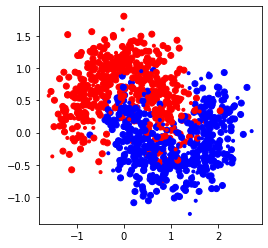

In [5]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)

In [6]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 8.1.1. AdaBoost alphas and distribution (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [7]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    
    y, y_pred_t, distribution = np.array(y), np.array(y_pred_t), np.array(distribution)
    N = np.sum(distribution*(y*y_pred_t <= 0))
    alpha = np.log((1-N)/N)/2
    
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    
    y, y_pred_t, distribution = np.array(y), np.array(y_pred_t), np.array(distribution)
    
    distribution = distribution*np.exp(-1*alpha_t*y*y_pred_t)
    #distribution /= np.sum(distribution)
    
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.1.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [8]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_pred_t = self.classifiers[-1].predict(X)
            
            # update alphas, append new alpha to self.alphas
            self.alphas.append(self.get_alpha(y, y_pred_t, distribution))
            
            # update distribution and normalize
            distribution = self.update_distribution(y, y_pred_t, distribution, self.alphas[-1])
            distribution /= np.sum(distribution)
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        # get the weighted votes of the classifiers
        for i in range(self.n_estimators):
            final_predictions += self.alphas[i]*self.classifiers[i].predict(X)
        
        out = np.ones(X.shape[0]) - 2*np.array(final_predictions <= 0, dtype=int)
        ### END Solution (do not delete this comment)

        return out

In [9]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [10]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.875
accuracy ada_boost_sklearn: 0.875


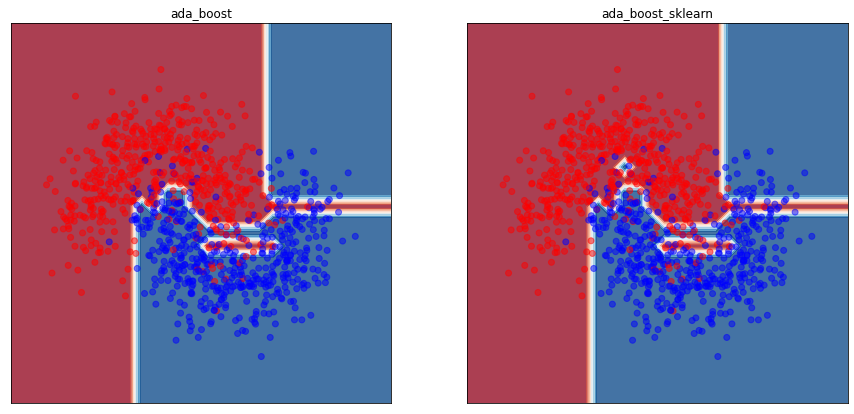

In [11]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 8. Boosting, part 2. (1+1+1 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to recompute all of the alphas on each iteration after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the available estimators. Take into account that at each step of the boosting algorithm **all** alphas and, consequently, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, the noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in the case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the regularization parameter (Lecture 2). Add it in order to guarantee the existence of the solution.

In [48]:
from scipy.optimize import minimize

### Subproblem 8.2.1. Recomputation of AdaBoost alphas and distribution (1 point)

Now let us define functions to recompute alphas and distributions for AdaBoost algorithm

In [197]:
def recompute_alpha(y, y_pred, C):
    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    ### BEGIN Solution (do not delete this comment)
    np.random.seed(0)
    y_pred = np.array(y_pred)
    alphas = np.random.rand(y_pred.shape[0])
    
    fun = lambda alphas: np.sum(np.exp(-1*np.sum(alphas.reshape(-1,1)*y_pred, axis=0)*y)) \
    + C*np.linalg.norm(alphas.reshape(-1,1))
    alphas = minimize(fun, alphas)
    alphas = alphas.x
    
    ### END Solution (do not delete this comment)

    return alphas
    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """

    ### BEGIN Solution (do not delete this comment)
    
    distribution = np.exp(-1*np.sum(alphas.reshape(-1,1)*y_pred, axis=0)*y)
    
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.2.2. Recomputed Boosting implementation (1 point)

Implement recomputation of Boosting algorithm. Then compare it with the `sklearn` implementation.

In [198]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        
        #notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((n_estimators, n_estimators))
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())        
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            
            
            ### BEGIN Solution (do not delete this comment)
            
            # create a list of predictions across all classifiers
            y_pred = []
            for classifier in self.classifiers:
                y_pred.append(classifier.predict(X))

            # recalculate alphas, add them to the matrix of self.alphas 
            
            alphas = self.get_alpha(y, y_pred, self.C)
            self.alphas[i] = np.pad(alphas, (0, n_estimators - len(alphas)))
            # NOTE: here, self.alphas is a history of computed alphas at each step i
            
            # update distribution and normalize
            
            distribution = self.update_distribution(y, y_pred, alphas)
            distribution /= np.sum(distribution)
            
            ### END Solution (do not delete this comment)
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        # get the weighted votes of the classifiers
        # do not forget that self.alphas is the whole history of recalculated alphas!
                                    
        for i in range(self.n_estimators):
            final_predictions += self.alphas[-1][i]*self.classifiers[i].predict(X)
        
        out = np.ones(X.shape[0]) - 2*np.array(final_predictions <= 0, dtype=int)

        ### END Solution (do not delete this comment)
        
        return out

In [199]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [188]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.895
accuracy ada_boost_sklearn: 0.875


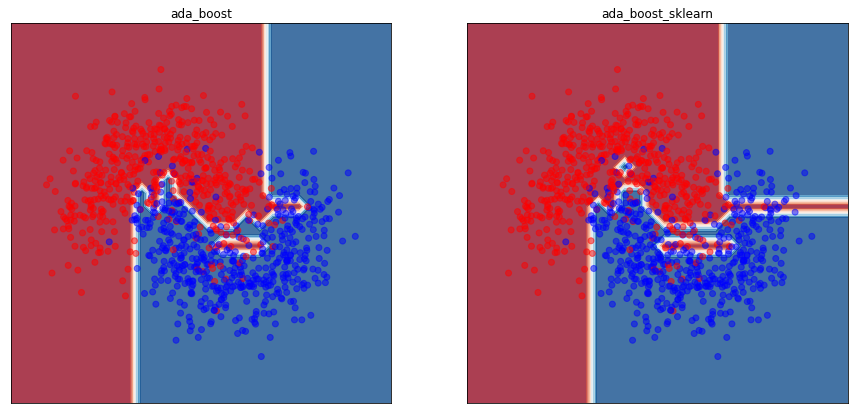

In [189]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

### Subproblem 8.2.3. Plotting the results (1 point)

- Plot the resulting alphas (last calculated in case of recomputed alphas)
- Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) for AdaBoost and RecomputedAdaBoost

In [216]:
from sklearn.metrics import accuracy_score

def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

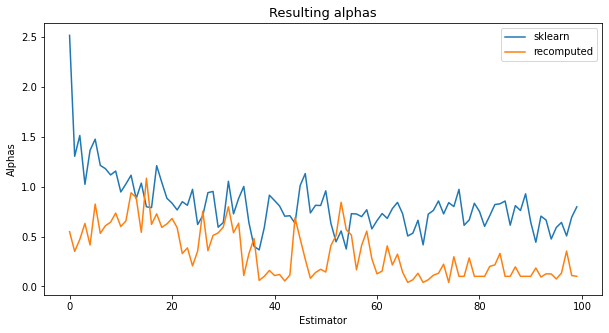

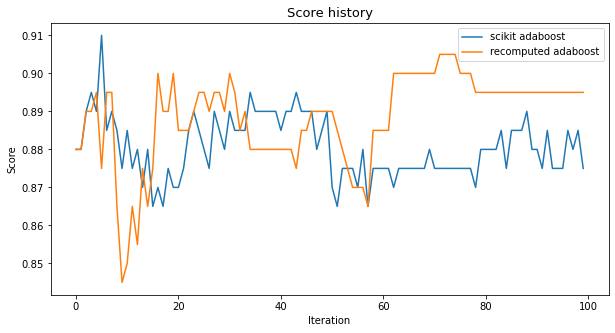

In [224]:
### BEGIN Solution (do not delete this comment)

plt.figure(figsize=(10,5))
plt.plot(np.arange(ada_boost.n_estimators), ada_boost_sklearn.estimator_weights_, label='sklearn')
plt.plot(np.arange(ada_boost.n_estimators), ada_boost.alphas[-1], label='recomputed')
plt.legend()
plt.xlabel('Estimator')
plt.ylabel('Alphas')
plt.title('Resulting alphas', fontsize=13)
plt.show()

####
sklearn_alphas = construct_alpha_history(ada_boost_sklearn.estimator_weights_)
score_history_rec = []
score_history_sk = []

for i in range(ada_boost.n_estimators):
    score_history_rec.append(score(ada_boost.alphas[i], ada_boost.classifiers, X_test, y_test))
    score_history_sk.append(score(sklearn_alphas[i], ada_boost_sklearn.estimators_, X_test, y_test))
    
plt.figure(figsize=(10,5))
plt.plot(np.arange(ada_boost.n_estimators), score_history_sk, label='scikit adaboost')
plt.plot(np.arange(ada_boost.n_estimators), score_history_rec, label='recomputed adaboost')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.title('Score history', fontsize=13)
plt.show()

### END Solution (do not delete this comment)

Make a conclusion about which method is better and in which case.

**Your text answer (do not delete this comment)**:

As 'Recomputed adaboost' recalculates all alphas at every iteration, it works significantly longer. However, as we can see from the Score history graph, it gives better score almost everywhere. So if we prefer speed, than we should use sklearn realization, while if we need score, than recomputed one is preferable.

## Task 9. Gradient Boosting and Feature Selection (1+1 points)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

### Subproblem 9.1 (1 point)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

Train time for XGBClassifier: 0.18796360000123968
Average precision score for XGBClassifier: 0.7451412369734258
Train time for RandomForestClassifier: 0.3959288000005472
Average precision score for RandomForestClassifier: 0.7478526952727166


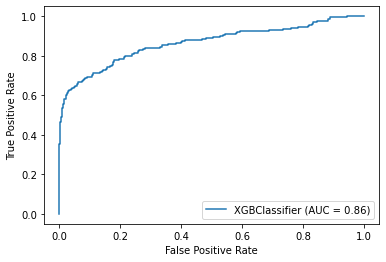

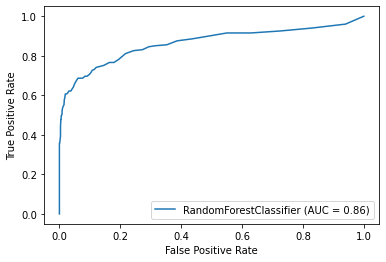

In [79]:
### BEGIN Solution (do not delete this comment)
from time import perf_counter
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve

import warnings
warnings.filterwarnings("ignore")


xgb = XGBClassifier(random_state=42, verbosity=0)
rf = RandomForestClassifier(random_state=42)

t_start = perf_counter()
xgb.fit(X_train, y_train)
t_finish = perf_counter()
print('Train time for XGBClassifier:', t_finish-t_start)

score = average_precision_score(y_test, xgb.predict_proba(X_test)[:, 1])
print('Average precision score for XGBClassifier:', score)

t_start = perf_counter()
rf.fit(X_train, y_train)
t_finish = perf_counter()
print('Train time for RandomForestClassifier:', t_finish-t_start)

score = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
print('Average precision score for RandomForestClassifier:', score)

plot_roc_curve(xgb, X_test, y_test)
plt.show()

plot_roc_curve(rf, X_test, y_test)
plt.show()

### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

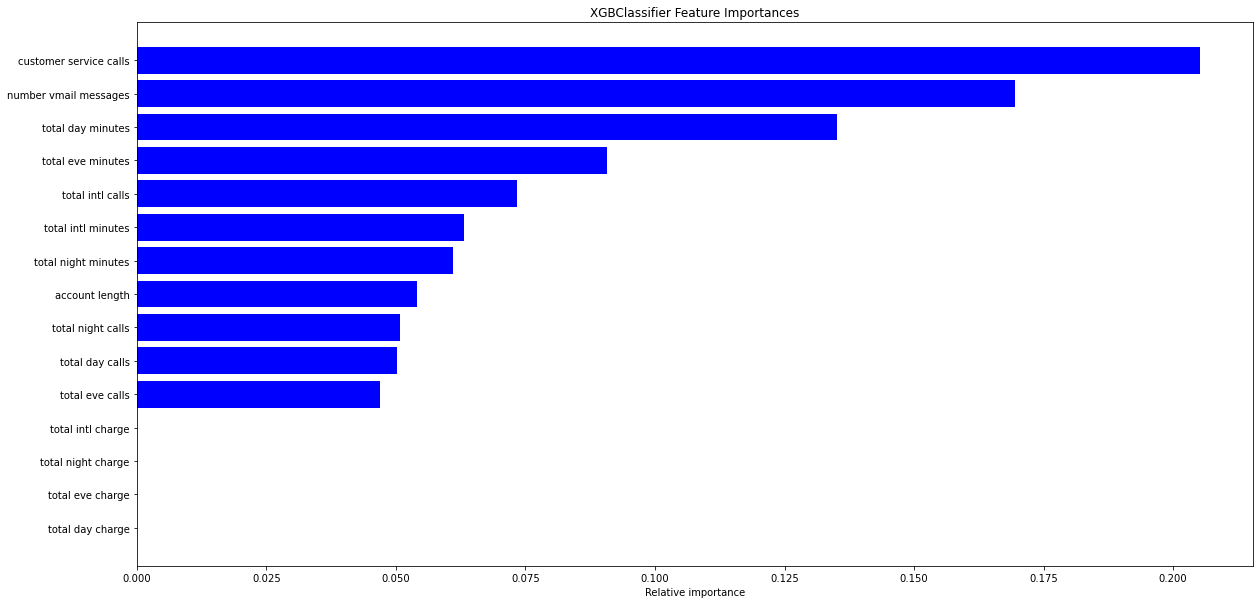

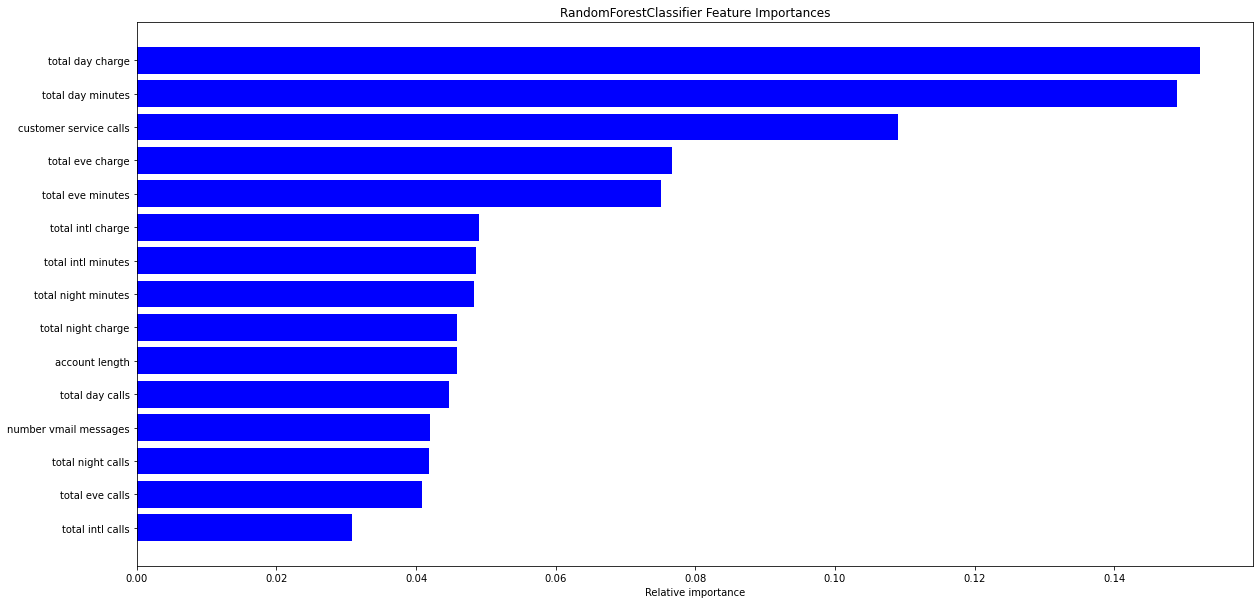

In [80]:
### BEGIN Solution (do not delete this comment)

features = X_train.columns
n_features = len(features)

for model in [xgb, rf]:
    feature_imp = model.feature_importances_
    idx = np.argsort(feature_imp)
    
    plt.figure(figsize=(20, 10))
    plt.title(model.__class__.__name__ + " Feature Importances")
    plt.barh(range(n_features), feature_imp[idx], color="b")
    plt.yticks(range(n_features), features[idx])
    plt.xlabel('Relative importance')

    plt.show()
    

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

Some features are in the top for both models, but for some of them importances are the opposite (for example, "total day charge" is the most important for Random Forest and means nothing for XGBClassifier.

As far as I understood from surfing Google, RF by default uses gini importance, which uses gini impurity  for minimization, and XGBClassifier uses importance_type = 'gain' by default, which uses information gain as a criteria.

So RF and XGB use different criterias for calculating the importance + approaches are different (boosting vs bagging), which leads to our situation, that some of them are similar (important in both cases), while some has extremely different significance.

### Subproblem 9.2 (1 point)

* For each model separately (XGBoost classifier and Random Forest classifier) perform the following steps:
    1. define the subset of features (in the beginning the subset contains all features)
    2. fit the model using the subset of features
    3. remove the least important feature from the subset (use the importances received in subproblem 9.1)
    4. repeat steps 2 and 3 until no features are left in the subset
    5. make a plot showing how the average precision changes depending on the size of the subset of the most important features


**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and its ```.transform``` methods to get the new $X$,$y$ subsets

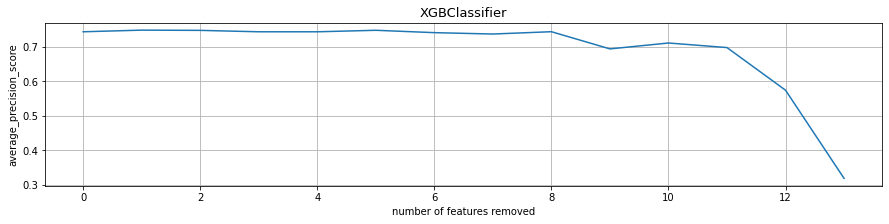

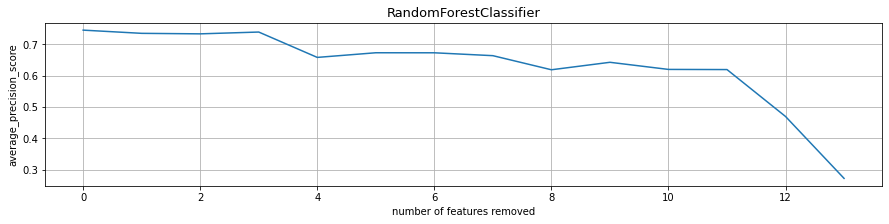

In [85]:
### BEGIN Solution (do not delete this comment)

init_models = [xgb, rf]
new_models = [XGBClassifier(random_state=42, verbosity=0), 
              RandomForestClassifier(random_state=42)]

for j in range(2):
    features = np.copy(X_train.columns)
    n_features = len(features)
    feature_imp = init_models[j].feature_importances_
    idx = np.argsort(feature_imp)
    features_sorted = features[idx]
    scores = []
    for i in range(n_features - 1):
        new_models[j].fit(X_train[features_sorted[i:]], y_train)
        score = average_precision_score(y_test, new_models[j].predict_proba(X_test[features_sorted[i:]])[:, 1])
        scores.append(score)
    
    
    plt.figure(figsize=(15, 3))
    plt.grid()
    plt.plot(np.arange(n_features - 1), scores)
    plt.title(new_models[j].__class__.__name__, fontsize=13)
    plt.xlabel('number of features removed')
    plt.ylabel('average_precision_score')


### END Solution (do not delete this comment)

# Task 10. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results. Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta-model, which uses the predictions of base models as features. This technique is widely used in multiple real case scenarios to get better results. One of the main problems of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Complete the ```meta_classfier``` function
* Train meta-classifier on original datasets features, report score on the test.
* Train meta-classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain a better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

**Note**: To save your time, use only part of the dataset to debug your solution.

In [196]:
import sklearn
fc = sklearn.datasets.fetch_covtype()

X_train, X_test, y_train, y_test = train_test_split(fc['data'], fc['target'], test_size=0.4)

### Subproblem 10.1. Base models (1 point)

Chose 6 different base models (base models can be any models that you know, and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them. 

In [197]:
##### BEGIN Solution (do not delete this comment)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from time import perf_counter
from sklearn.ensemble import ExtraTreesClassifier

scaler = StandardScaler()

t_start = perf_counter()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
t_finish = perf_counter()
print(t_finish - t_start)


dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt_32 = DecisionTreeClassifier(min_samples_split=32, random_state=42)
rf_3_100 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
rf_inf_300 = RandomForestClassifier(n_estimators=300, random_state=42)
xgb = XGBClassifier(max_depth=6, random_state=42, verbosity=0)
lr_05 =LogisticRegression(C=0.5, random_state=42, max_iter=10000)
lr =LogisticRegression(random_state=42, max_iter=10000)
rf_100_32 = RandomForestClassifier(n_estimators=100, min_samples_split=32, random_state=42)
etc = ExtraTreesClassifier(max_depth=13, random_state=42)

models = [dt, rf_3_100, rf_100_32, dt_32, lr_05, etc]

for model in tqdm(models + [knn, lr, xgb, rf_inf_300]):
    print(model.__class__.__name__)
    t_start = perf_counter()
    model.fit(X_train, y_train)
    t_finish = perf_counter()
    print(t_finish - t_start)


### END Solution (do not delete this comment)

1.462405199999921


  0%|          | 0/10 [00:00<?, ?it/s]

DecisionTreeClassifier
6.341103000006115
RandomForestClassifier
39.22195069999725
RandomForestClassifier
181.05858299999818
DecisionTreeClassifier
14.173753099996247
LogisticRegression
242.36158350000187
ExtraTreesClassifier
52.17007810000359
KNeighborsClassifier
867.5088249999972
LogisticRegression
216.79867110000487
XGBClassifier
106.70789030000014
RandomForestClassifier
240.3600923999984


Report individual scores on the test set. As a score use accuracy.

In [198]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

cols = ['Model', 'Accuracy on test set', 'Time']
row_format ="{:>25}{:>25}{:>25}"#code for printing is based on https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
print(row_format.format(*cols))

for i, model in enumerate(models + [knn, lr, xgb, rf_inf_300]):
    t_start = perf_counter()
    score = np.round(accuracy_score(y_test, model.predict(X_test)), 3)
    t_finish = perf_counter()
    print(row_format.format(model.__class__.__name__, score, np.round(t_finish-t_start, 4)))

### END Solution (do not delete this comment)

                    Model     Accuracy on test set                     Time
   DecisionTreeClassifier                    0.729                   0.2764
   RandomForestClassifier                    0.634                   3.2998
   RandomForestClassifier                    0.919                    6.467
   DecisionTreeClassifier                    0.907                   0.1064
       LogisticRegression                    0.725                   0.0799
     ExtraTreesClassifier                    0.728                   3.3693
     KNeighborsClassifier                    0.921                4729.3915
       LogisticRegression                    0.725                   0.0602
            XGBClassifier                    0.872                    0.839
   RandomForestClassifier                    0.951                  23.7096


### Subproblem 10.2. Meta classifier (1 point)

Write meta-classifier function.

In [199]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    
    base_predictions = []
    for model in tqdm(base_clfs):
        y_pred = cross_val_predict(model, X_train, y_train, cv=cv)
        base_predictions.append(y_pred)
    base_predictions_matrix = np.vstack(base_predictions).T
    
    final_classifier.fit(base_predictions_matrix, y_train)
    
    
    base_predictions = []
    for model in tqdm(base_clfs):
        base_predictions.append(model.predict(X_test))
    base_predictions_matrix = np.vstack(base_predictions).T
    
    return final_classifier.predict(base_predictions_matrix)
    
        
    ### END Solution (do not delete this comment)


Train meta-classifier on original datasets features. And report score on the test.

In [200]:
%%time
### BEGIN Solution (do not delete this comment)

lr =LogisticRegression(random_state=42, max_iter=10000)

lr.fit(X_train, y_train)
print('meta_classifier accuracy on test set:', accuracy_score(y_test, lr.predict(X_test)))

### END Solution (do not delete this comment)

meta_classifier accuracy on test set: 0.72502312772961
Wall time: 3min 36s


Train meta-classifier on those base models. Report the test score (accuracy) in this case.

In [201]:
%%time
### BEGIN Solution (do not delete this comment)

models = [xgb, rf_inf_300, rf_100_32, dt_32, etc, dt]
pred = meta_classifier(base_clfs=models, final_classifier=lr, X_train = X_train, X_test=X_test, y_train=y_train, cv=5)
print('meta_classifier (with stacking) accuracy on test set:', accuracy_score(y_test, pred))

### END Solution (do not delete this comment)

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

meta_classifier (with stacking) accuracy on test set: 0.9197994879628235
Wall time: 33min 42s


Does stacking helped to gain better score?

**Your text answer (do not delete this comment)**:

Stacking of models (with best combination of computational time and scores on test from 10.1 ), which had scores:

[0.872(XGBoost), 

0.951(RandomForest n_est=300, max_depth=None), 

0.919(RandomForest n_est=100, min_samples_split=32), 

0.907(DecisionTree with min_samples_split=32), 

0.729(ExtraTreesClassifier), 

0.728(DecisionTree with max_depth = 7)], 

gives accuracy 0.92, which is better, than all, except RF.

But it gived better accuracy, than simple LogReg on all data (which is 0.725), so in this case stacking helped to gain better score.